In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [62]:
ecommerce = pd.read_csv("data.csv", encoding = "ISO-8859-1")

In [63]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [64]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [65]:
ecommerce["CustomerID"] = ecommerce["CustomerID"].astype(str)

In [182]:
ecommerce["TotalPrice"] = ecommerce["Quantity"]*ecommerce["UnitPrice"]

In [66]:
ecommerce["InvoiceDate"] = pd.to_datetime(ecommerce["InvoiceDate"])

In [67]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     541909 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [88]:
id_length = ecommerce["CustomerID"][ecommerce["CustomerID"]!="nan"].str.len()[0]
ecommerce["CustomerID"][ecommerce["CustomerID"]!="nan"] = ecommerce["CustomerID"][ecommerce["CustomerID"]!="nan"].str.slice(0,id_length-2)

/home/williamtjhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [191]:
columnNames = ['UnitPriceMean', 'UnitPriceStd', 'TotalQuantity', 'NoOfUniqueItems', 'NoOfInvoices',
                                'UniqueItemsPerInvoice', 'QuantityPerInvoice', 'SpendingPerInvoice']
customer = pd.DataFrame(columns=columnNames)
for i in ecommerce["CustomerID"].unique():

    tempCustomer = ecommerce[ecommerce["CustomerID"]==i]
    tempCustomer1 = [tempCustomer["UnitPrice"].mean(), tempCustomer["UnitPrice"].std(),
    tempCustomer["Quantity"].sum(), len(tempCustomer["StockCode"].unique()),
    len(tempCustomer["InvoiceNo"].unique()), tempCustomer.groupby("InvoiceNo")["StockCode"].nunique().mean(),
    tempCustomer.groupby("InvoiceNo")["Quantity"].sum().mean(), 
    tempCustomer.groupby("InvoiceNo")["TotalPrice"].sum().mean()]

    tempCustomer1 = np.array(tempCustomer1)
    tempCustomer1.shape = (1, len(tempCustomer1))
    tempCustomer1 = pd.DataFrame(tempCustomer1, columns=columnNames)

    customer = customer.append(tempCustomer1)

In [241]:
customer.describe()

,UnitPriceMean,UnitPriceStd,TotalQuantity,NoOfUniqueItems,NoOfInvoices,UniqueItemsPerInvoice,QuantityPerInvoice,SpendingPerInvoice
count,4373.000000,4294.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000
mean,7.978630,8.850251,1183.729705,62.068374,5.922708,19.256582,196.778359,0.024205
std,144.946736,264.599389,6189.372699,102.515661,56.798813,17.278739,321.108330,1.600667
min,0.000000,0.000000,-303.000000,1.000000,1.000000,1.000000,-244.000000,0.000000
25%,2.221642,1.816184,153.000000,15.000000,1.000000,8.000000,78.000000,0.000000
50%,2.944593,2.653241,365.000000,35.000000,3.000000,14.500000,137.000000,0.000000
75%,3.898836,3.622348,963.000000,77.000000,5.000000,24.666667,232.105263,0.000000
max,8055.780000,17284.579055,269562.000000,3810.000000,3710.000000,219.000000,12540.000000,105.850000


In [215]:
customer_normalised = customer.copy()
for i in range(customer_normalised.shape[1]):
    customer_normalised.iloc[:,i]=(customer_normalised.iloc[:,i]-np.mean(customer_normalised.iloc[:,i]))/np.std(customer_normalised.iloc[:,i])

In [ ]:
customer_normalised = customer_normalised.fillna(0)

In [217]:
import seaborn as sns

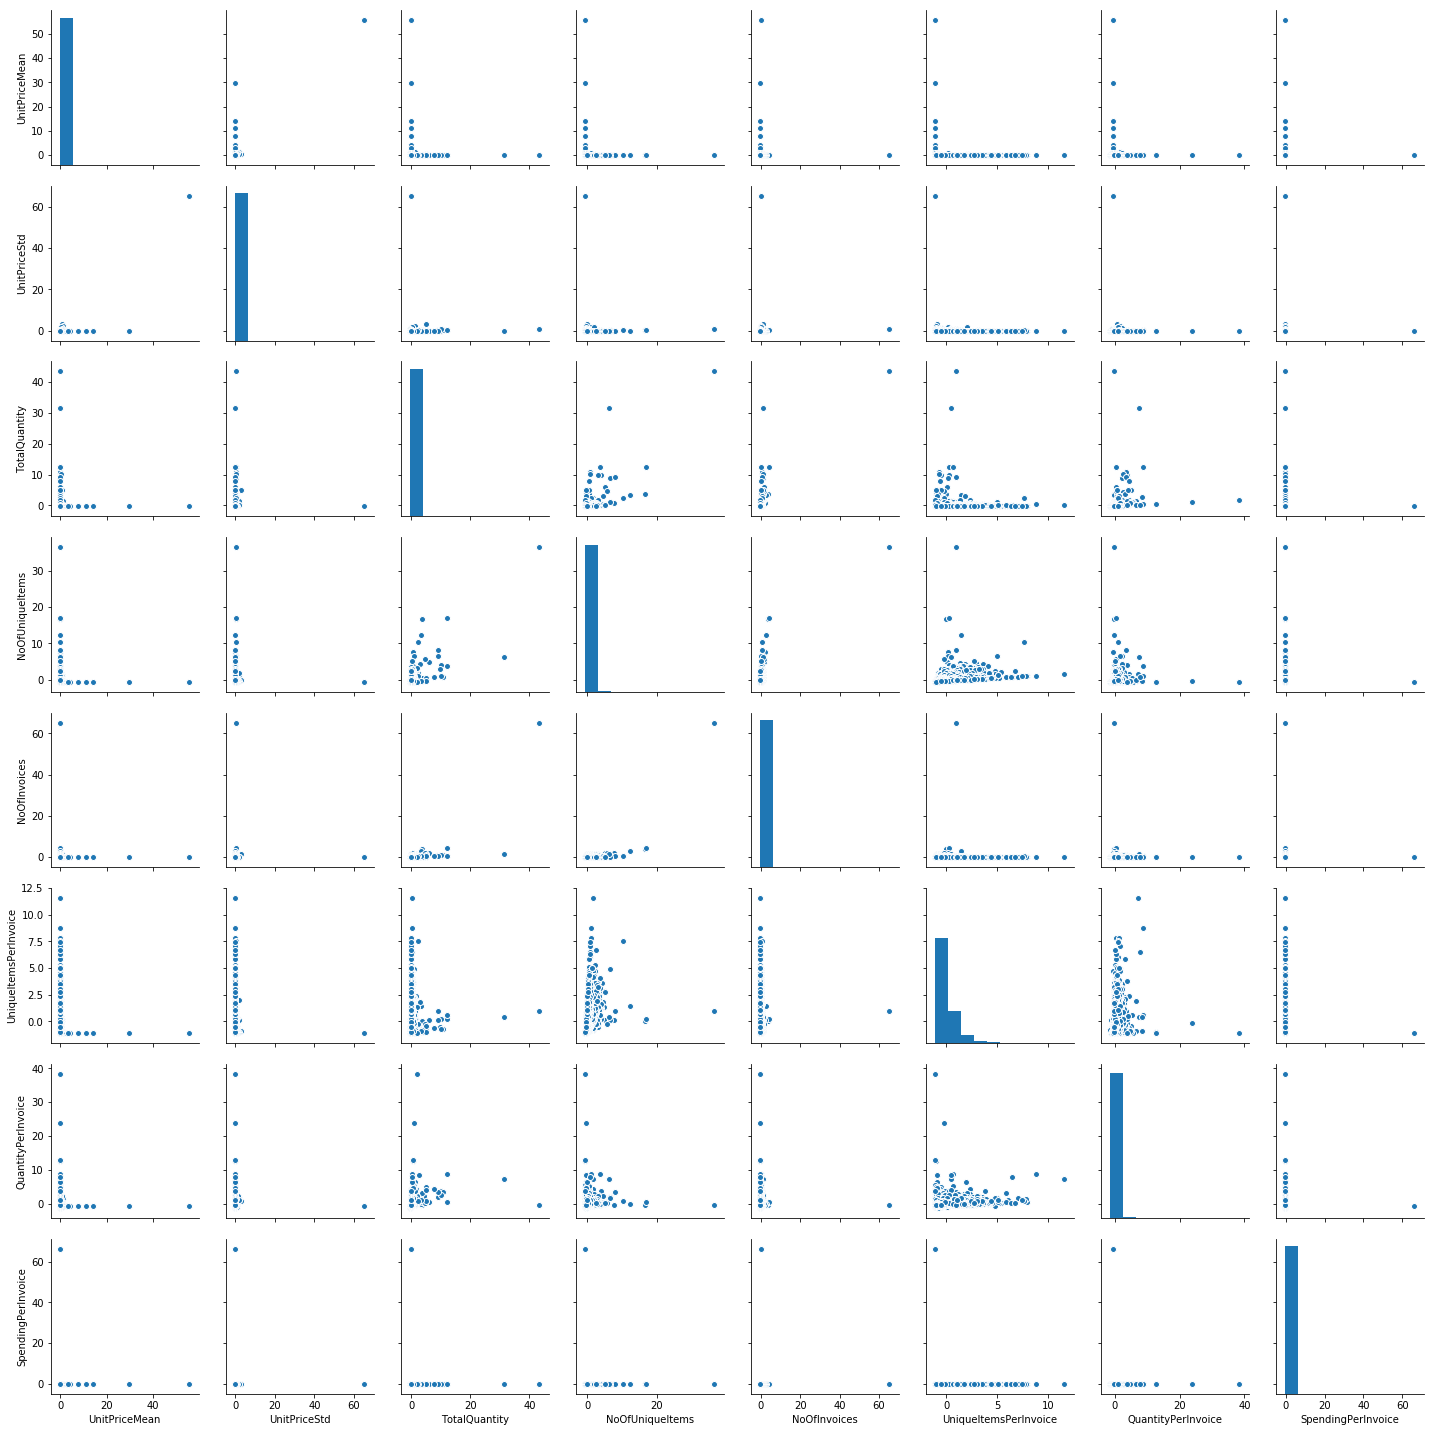

In [234]:
sns.pairplot(customer_normalised)

### Need to remove outliers from customers and most likely need to do feature selection

# Start clustering here

In [256]:
from sklearn.cluster import k_means
customer_km = k_means(customer_normalised, n_clusters=10)
customer_km[0]

array([[-3.39922929e-02, -1.76970283e-02,  1.26283809e-02,
         3.18809886e-01,  4.75743699e-03,  4.34364916e-01,
         1.02833573e-01, -1.51237651e-02],
       [ 6.75819928e-04,  5.40693707e-01,  4.33661010e+01,
         3.65637814e+01,  6.52214487e+01,  9.84481127e-01,
        -3.86580853e-01, -1.51237651e-02],
       [ 5.55288234e+01,  6.52977348e+01, -1.81578694e-01,
        -5.86010398e-01, -1.62470479e-02, -1.05671307e+00,
        -5.75505126e-01, -1.51237651e-02],
       [-1.96899352e-02, -1.64243457e-02, -1.10705133e-01,
        -3.49923424e-01, -3.55222557e-02, -5.44466987e-01,
        -2.40447522e-01, -1.51237651e-02],
       [ 2.05020800e-02, -3.34516344e-02, -1.81901866e-01,
        -5.95766120e-01,  1.36096709e-03, -1.05671307e+00,
        -5.82772456e-01,  6.61211010e+01],
       [-2.71629794e-02,  6.28850081e-02,  1.00708633e+01,
         6.41999214e+00,  1.58734004e+00,  1.05430261e-01,
         2.74564162e+00, -1.51237651e-02],
       [-3.60686889e-02, -1.585819

In [257]:
from sklearn.mixture import GMM
customer_gmm = GMM(n_components=10).fit(customer_normalised)
customer_gmm.predict(customer_normalised)

array([7, 4, 7, ..., 6, 6, 4])

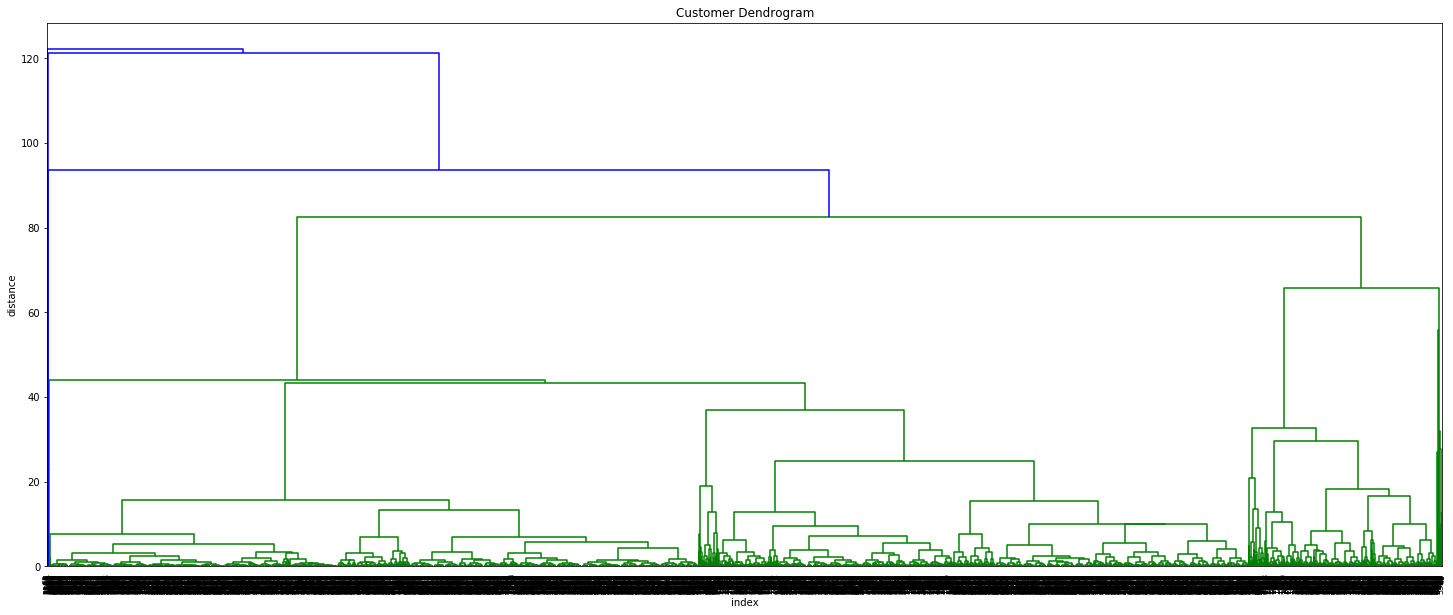

In [265]:
from scipy.cluster.hierarchy import dendrogram, linkage
customer_hac = linkage(customer_normalised, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Customer Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
    customer_hac,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
##to add proper analysis with cluster validity index